## Multiple Linear Regression model for the prediction of car prices

### Problem Statement :

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. <br/>
#### Company wants to know:
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Imporing car price csv file
car_pricing = pd.read_csv("CarPrice.csv")

In [4]:
# Check the head of the dataset
car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [5]:
car_pricing.shape

(205, 26)

In [6]:
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car_pricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables :

<Figure size 2160x2160 with 0 Axes>

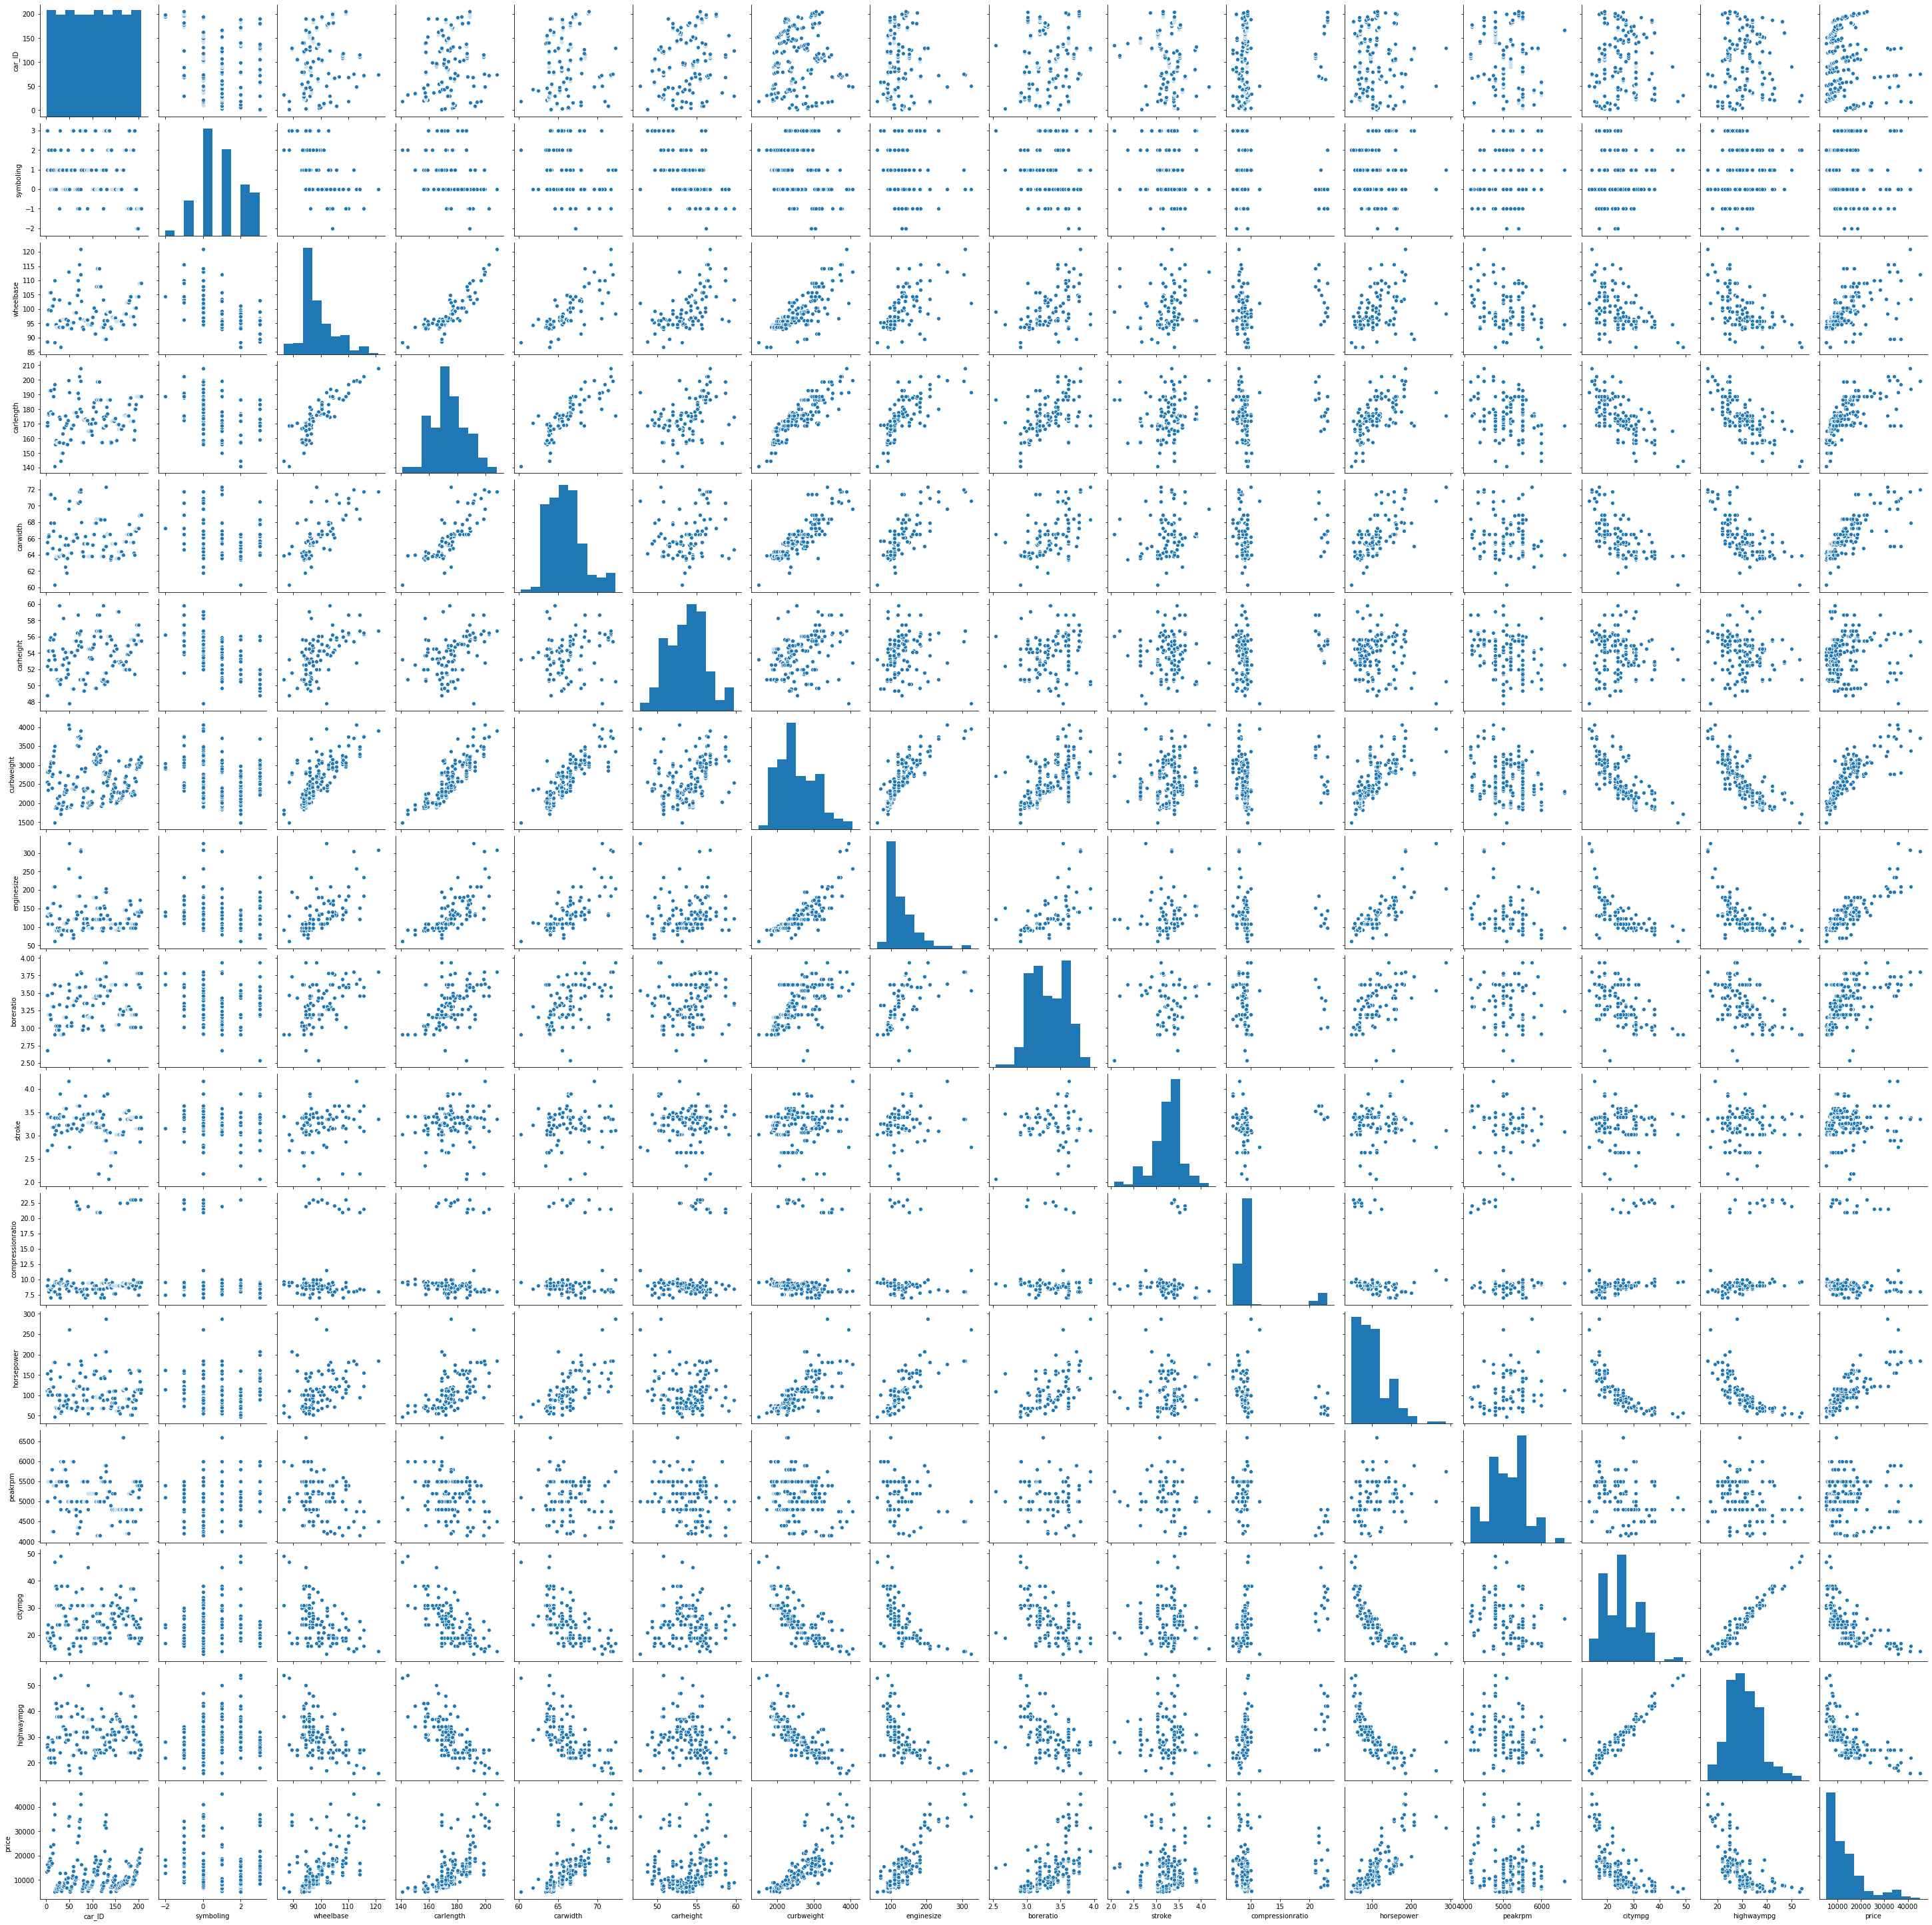

In [9]:
plt.figure(figsize = (30,30))
sns.pairplot(car_pricing)
plt.show()

Unable to visualize much from the pairplot.

#### Visualising Categorical Variables :

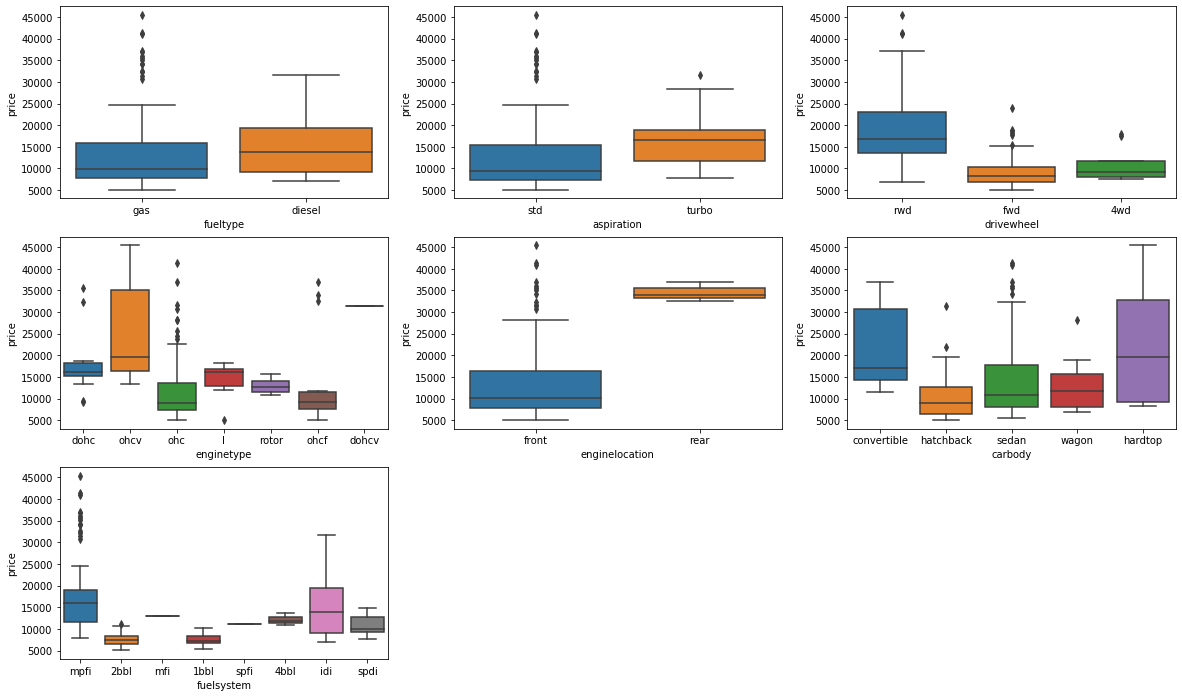

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_pricing)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_pricing)
plt.subplot(3,3,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pricing)
plt.subplot(3,3,4)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pricing)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_pricing)
plt.subplot(3,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_pricing)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pricing)

#### Observation :
1. cars with fueltype <b>diesel</b> has more price
2. on the other hand, there are some cars with fueltype <b>gas</b> has significantly high price
3. cars whose engine location is at <b>rear</b> has significantly high price

## Step 3 : Data Cleaning 

In [11]:
# Split the company name from CarName variable
car_pricing['companyname'] = car_pricing['CarName'].apply(lambda name : name.split(' ')[0])

In [12]:
# Dropping the CarName variable as it is not required
car_pricing.drop(columns = {'CarName'}, axis = 1, inplace = True)

In [13]:
# Check unique values in companyname variable
car_pricing.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

By looking at the unique values, we know that there are some spelling mistakes and some company names are in upper and lower case in companyname variable. We have to correct those records.
1. <b>mazda</b> : maxda
2. <b>nissan</b> : we will convert all the occurances to lower case
3. <b>porsche</b> : porcshce
4. <b>toyota</b> : toyouta
5. <b>volkswagen</b> : vokswagen, vw

In [14]:
# Correct the spelling mistakes
car_pricing['companyname'].replace('maxda', 'mazda', inplace = True)
car_pricing['companyname'].replace('porcshce', 'porsche', inplace = True)
car_pricing['companyname'].replace('toyouta', 'toyota', inplace = True)
car_pricing['companyname'].replace('vokswagen', 'volkswagen', inplace = True)
car_pricing['companyname'].replace('vw', 'volkswagen', inplace = True)

In [15]:
car_pricing['companyname'] = car_pricing['companyname'].str.lower()

In [16]:
car_pricing.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

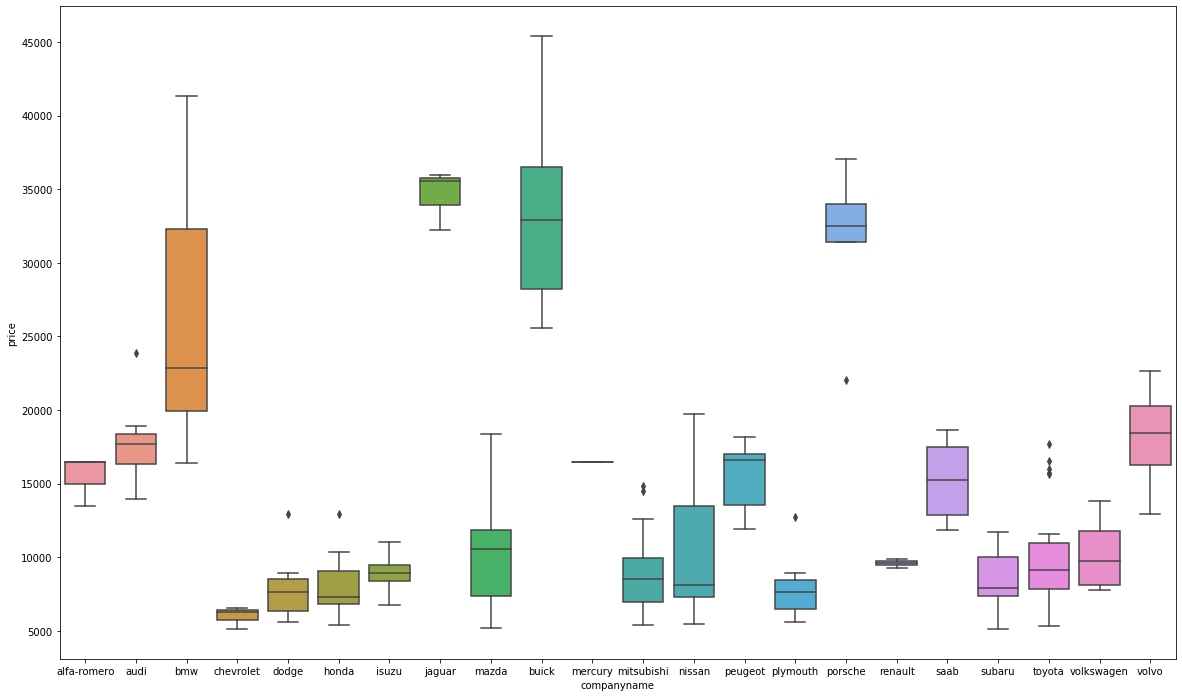

In [17]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'companyname', y = 'price', data = car_pricing)

#### Observation :
1. From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to <b>Bmw</b>, <b>Buick</b>, <b>Jaguar</b> and <b>porsche</b>.
2. The lower priced cars belong to chevrolet

In [18]:
car_pricing['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [19]:
# Convert values of doornumber into numeric form.
car_pricing.replace({'doornumber': {'four' : 4, 'two' : 2 }}, inplace=True)

In [20]:
car_pricing['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [21]:
car_pricing['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [22]:
# Convert values of cylindernumber into numeric form.
car_pricing.replace({'cylindernumber': {'four' : 4, 'six' : 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 
                                        'twelve': 12 }}, inplace=True)

In [23]:
car_pricing['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [24]:
# Check for duplicate values in dataframe
car_pricing.loc[car_pricing.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname


#### No Duplicates found

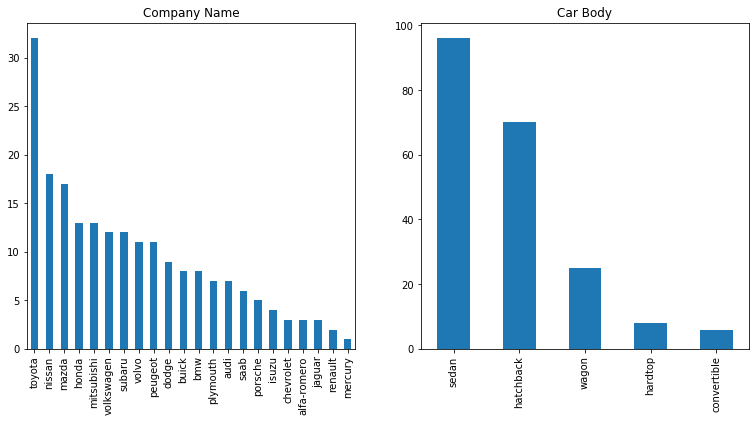

In [25]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
plt.title('Company Name')
car_pricing.companyname.value_counts().plot(kind = 'bar')

plt.subplot(1,3,2)
plt.title('Car Body')
car_pricing.carbody.value_counts().plot(kind = 'bar')

#### Observations :
1. More people tend to buy car of <b>toyota</b> company.
2. Large number of companies uses <b>sedan</b> as car body.

### Create Dummy Variables :
Creating dummy variables for all the categorical variables present in dataset.

In [26]:
# Drop car_ID as it is not useful in model building
car_pricing.drop(columns =['car_ID'], inplace = True)

In [27]:
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [28]:
# Method to create dummy variables
def create_dummy_vars(var,df):
    temp = pd.get_dummies(df[var], drop_first = True)
    df= pd.concat([df, temp], axis = 1)
    df.drop([var], axis = 1, inplace = True)
    return df

In [29]:
# Created a list of categorical variables
categorical_variables = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 
                         'enginelocation', 'enginetype', 'fuelsystem', 'companyname']

In [30]:
for var in categorical_variables:
   car_pricing = create_dummy_vars(var, car_pricing)

In [31]:
car_pricing.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [32]:
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   doornumber        205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   cylindernumber    205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
 1

## Step 4: Splitting the Data into Training and Testing Sets

In [33]:
# Splitting the whole data into training and test sets in 70-30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(car_pricing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
# Checking size of training data
df_train.shape

(143, 60)

In [35]:
# Checking size of test data
df_test.shape

(62, 60)

### Rescaling the Features

In [36]:
# Creating a list of numeric variables
numeric_variables = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 
                     'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg', 'price']

In [37]:
scaler = StandardScaler()

# Applied scaler() to all the columns except 'dummy' variables
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])

In [38]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


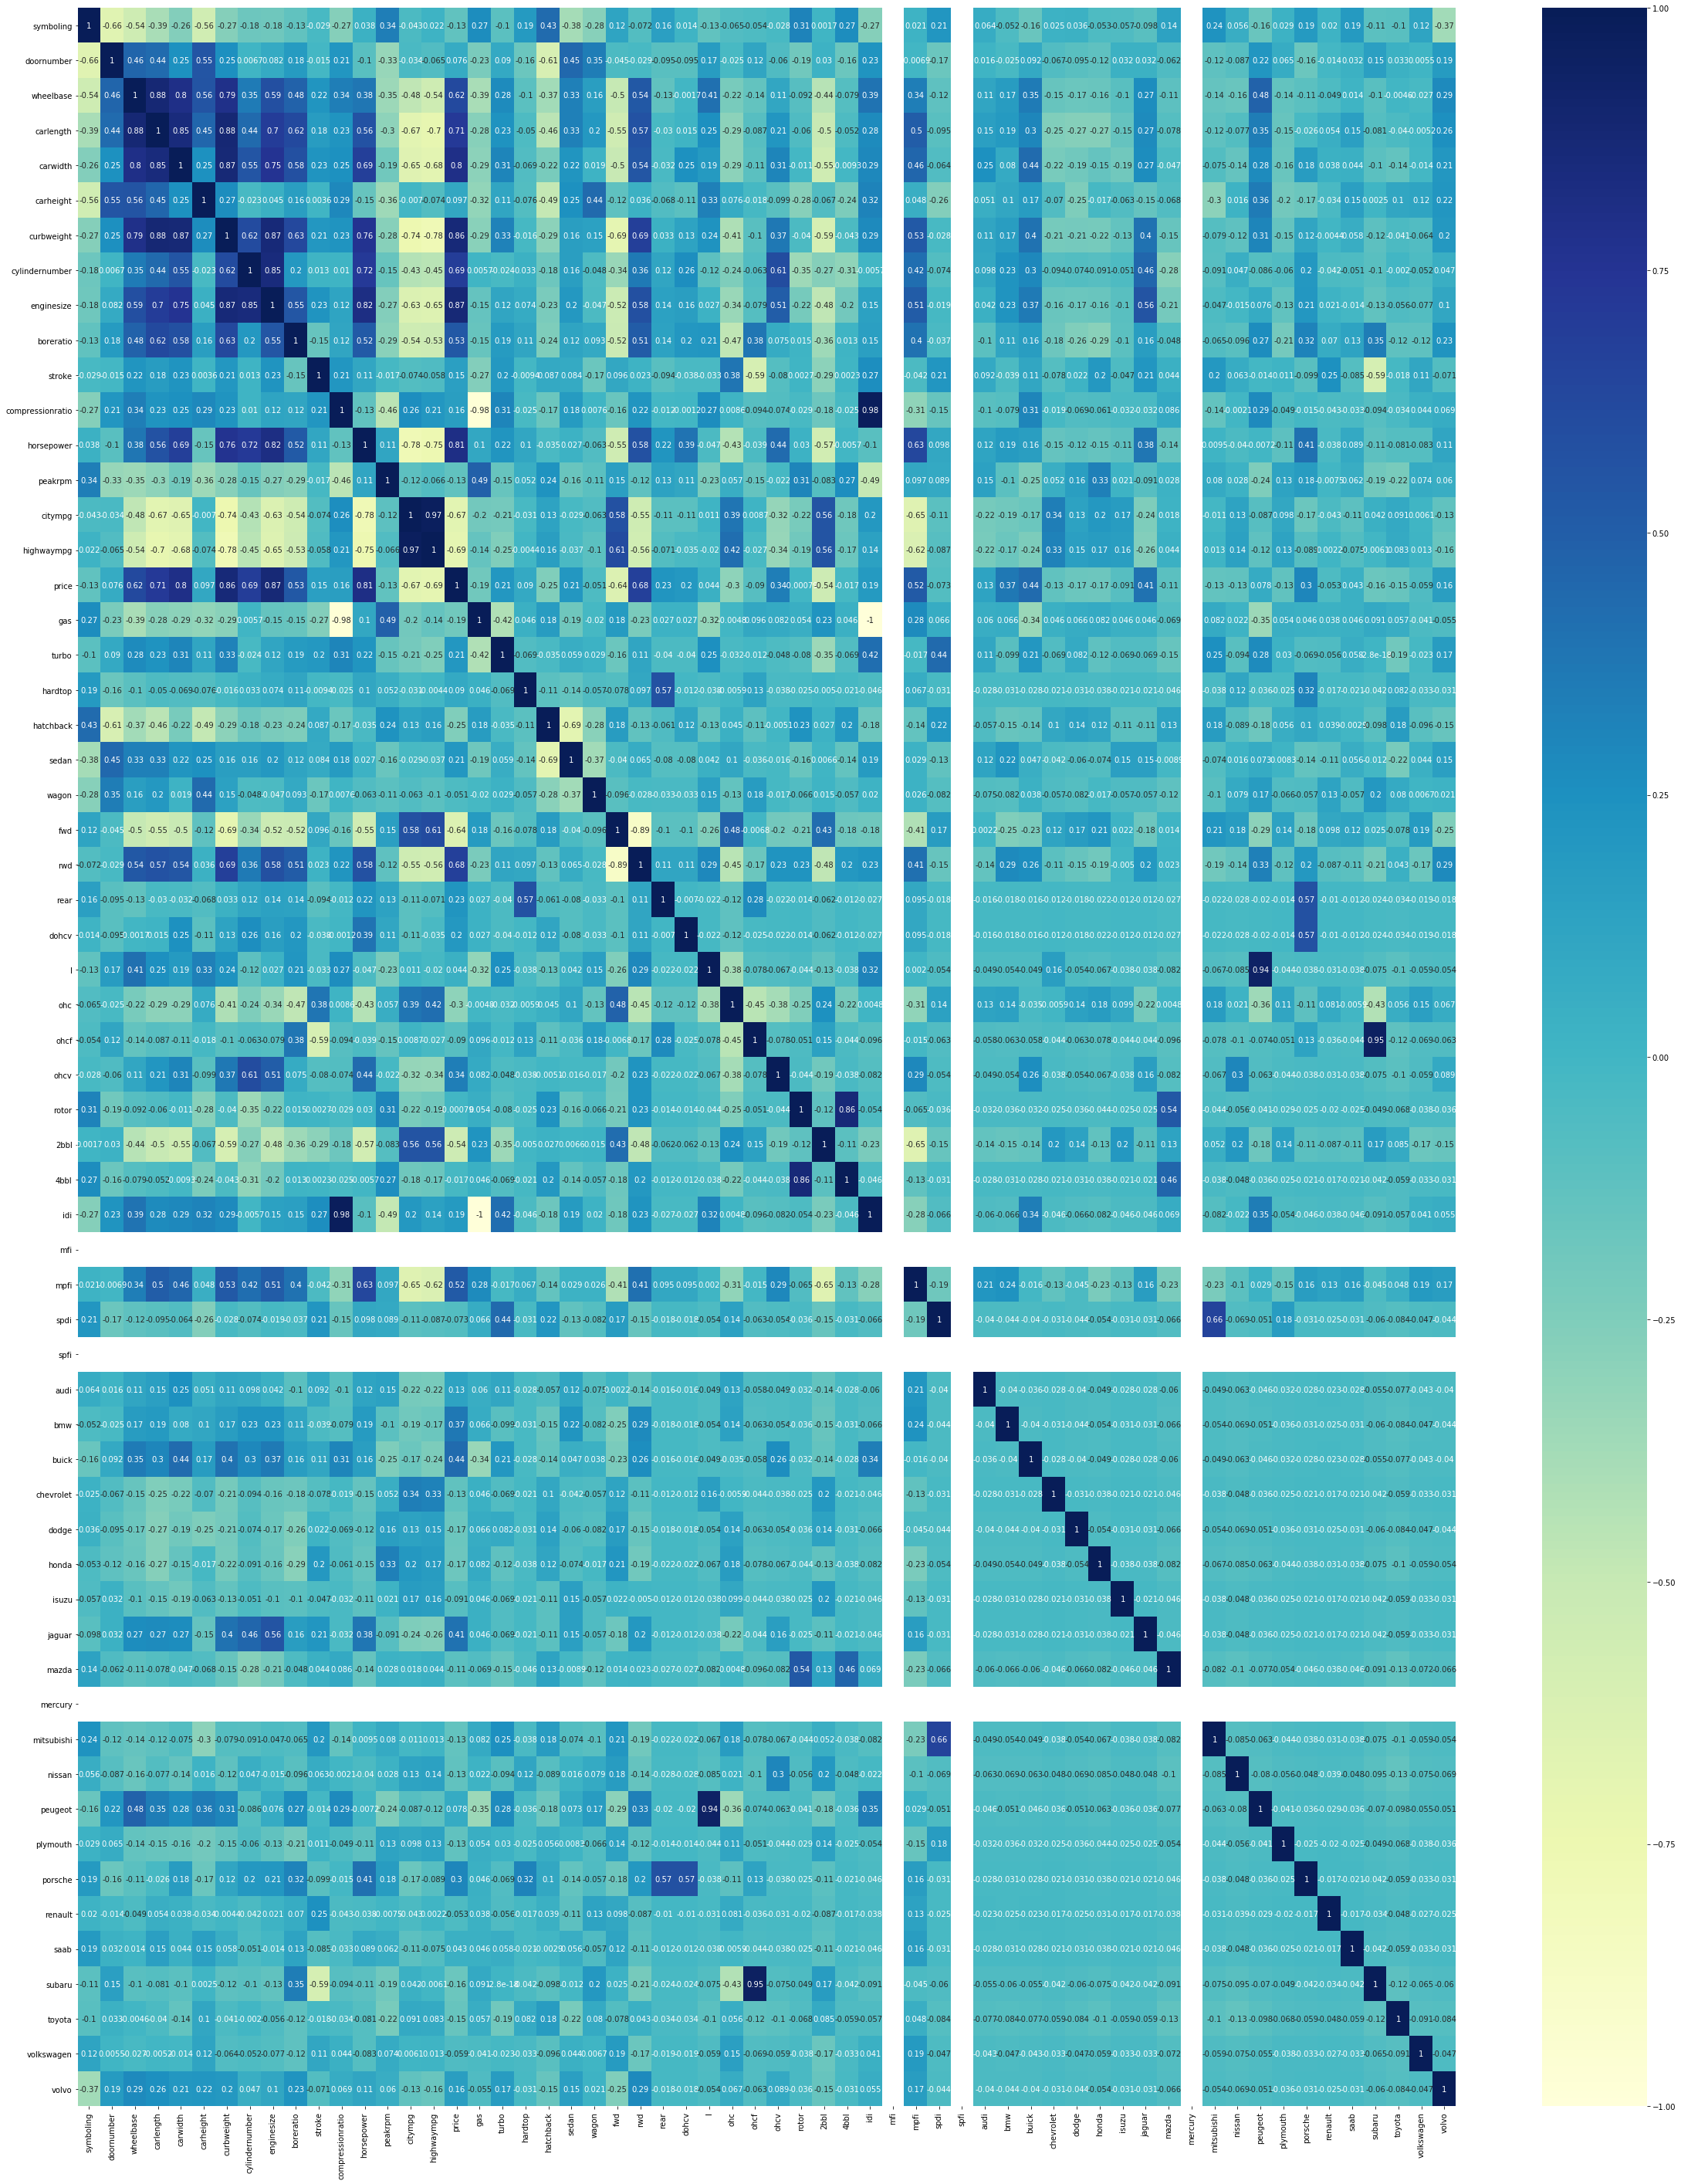

In [39]:
plt.figure(figsize=(40,50))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')

## Step 5 : Model Building

In [40]:
# Dividing training data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

#### RFE
We are using <b>Recursive Feature Elimination</b> method to get top 10 features who are highly correlated with price.

In [41]:
# Creating a object of LinearRegression class and fitting model on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Running RFE with the output number of the variable equal to 10
rfe = RFE(linear_model, 10)            
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 44),
 ('doornumber', False, 42),
 ('wheelbase', False, 32),
 ('carlength', False, 35),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', False, 22),
 ('cylindernumber', False, 36),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 37),
 ('compressionratio', False, 4),
 ('horsepower', False, 27),
 ('peakrpm', False, 28),
 ('citympg', False, 40),
 ('highwaympg', False, 34),
 ('gas', False, 3),
 ('turbo', False, 21),
 ('hardtop', False, 19),
 ('hatchback', False, 17),
 ('sedan', False, 18),
 ('wagon', False, 20),
 ('fwd', False, 39),
 ('rwd', False, 41),
 ('rear', True, 1),
 ('dohcv', False, 26),
 ('l', True, 1),
 ('ohc', False, 24),
 ('ohcf', True, 1),
 ('ohcv', False, 45),
 ('rotor', True, 1),
 ('2bbl', False, 31),
 ('4bbl', False, 15),
 ('idi', False, 2),
 ('mfi', False, 46),
 ('mpfi', False, 48),
 ('spdi', False, 50),
 ('spfi', False, 47),
 ('audi', False, 14),
 ('bmw', True, 1),
 ('buick', False, 38),
 ('chevrolet', False, 

In [44]:
columns = X_train.columns[rfe.support_]
columns

Index(['carwidth', 'enginesize', 'rear', 'l', 'ohcf', 'rotor', 'bmw',
       'peugeot', 'renault', 'subaru'],
      dtype='object')

In [45]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [46]:
X_train_rfe.head()

,carwidth,enginesize,rear,l,ohcf,rotor,bmw,peugeot,renault,subaru
122,-0.924500,-0.660242,0,0,0,0,0,0,0,0
125,1.114978,0.637806,0,0,0,0,0,0,0,0
166,-0.833856,-0.660242,0,0,0,0,0,0,0,0
1,-0.788535,0.123485,0,0,0,0,0,0,0,0
199,0.616439,0.123485,0,0,0,0,0,0,0,0


####  Building model using statsmodel, for the detailed statistics

In [47]:
# Creating methods to build a model and check VIF

def buildLRModel(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # print model summary
    return X

    
def getVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [48]:
X_train_new = buildLRModel(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.98e-64
Time:                        17:40:40   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0506      0.030     -1.675      0.0

All the features has p-value less than 0.05. Let's check VIF for Model 1.

In [49]:
# Drop constant variable
X_train_new = X_train_new.drop(['const'], axis = 1)

In [50]:
# Calculate VIF value for all variables
getVIF(X_train_new)

,Features,VIF
2,rear,inf
4,ohcf,inf
9,subaru,inf
7,peugeot,10.05
3,l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,rotor,1.14
6,bmw,1.09
8,renault,1.00


<b>subaru</b> has high VIF so dropping it.

In [51]:
X_train_new = X_train_new.drop(['subaru'], axis = 1)

#### Model 2

In [52]:
X_train_new = buildLRModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.98e-64
Time:                        17:40:42   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0506      0.030     -1.675      0.0

Drop <b>ohcf</b> as its p-value is greater than 0.05

In [53]:
X_train_new = X_train_new.drop(['ohcf'], axis = 1)

#### Model 3

In [54]:
X_train_new = buildLRModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           8.22e-65
Time:                        17:40:44   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0635      0.029     -2.195      0.0

All the features has p-value less than 0.05. Let's check VIF for Model 3.

In [55]:
# Drop constant variable
X_train_new = X_train_new.drop(['const'], axis = 1)

In [56]:
# Calculating VIF value for all variables
getVIF(X_train_new)

,Features,VIF
6,peugeot,10.05
3,l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,rotor,1.14
2,rear,1.09
5,bmw,1.09
7,renault,1.00


<b>peugeot</b> has high VIF so dropping it.

In [57]:
X_train_new = X_train_new.drop(['peugeot'], axis = 1)

#### Model 4

In [58]:
X_train_new = buildLRModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.49e-63
Time:                        17:40:46   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0663      0.030     -2.198      0.0

Drop <b>l</b> as its p-value is greater than 0.05

In [59]:
X_train_new = X_train_new.drop(['l'], axis = 1)

#### Model 5

In [60]:
X_train_new = buildLRModel(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.92e-64
Time:                        17:40:47   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0748      0.029     -2.578      0.0

All the features has p-value less than 0.05. Let's check VIF for Model 5.

In [61]:
# Drop constant variable
X_train_new = X_train_new.drop(['const'], axis = 1)

In [62]:
# Calculating VIF value for all variables
getVIF(X_train_new)

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,rotor,1.13
4,bmw,1.09
2,rear,1.08
5,renault,1.00


- All VIF values and p-values are in a good range.
- <b>Adjusted R-squared is ~89%</b>

## Step 6 : Residual Analysis of the training data

In [63]:
X_train_new.head()

,carwidth,enginesize,rear,rotor,bmw,renault
122,-0.924500,-0.660242,0,0,0,0
125,1.114978,0.637806,0,0,0,0
166,-0.833856,-0.660242,0,0,0,0
1,-0.788535,0.123485,0,0,0,0
199,0.616439,0.123485,0,0,0,0


In [64]:
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()

In [65]:
# Make predictions on training set
y_train_pred = lm.predict(X_train_new)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [66]:
# Calculate residual values 
residual = y_train - y_train_pred

Text(0.5, 0, 'Errors')

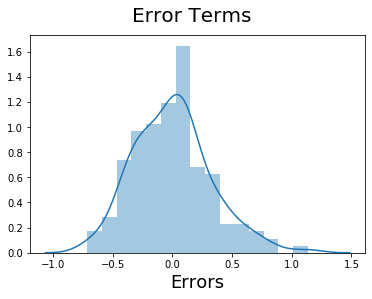

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins =15)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

Error terms seem to be normally distributed.

## Step 7 : Making Predictions

Applying the scaling on the test set

In [68]:
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])

In [69]:
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.102493,0.010224,0.129960,0.166583,0.101818,0.236036,0.097811,-0.071928,0.157852,0.284055,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.139963,1.006876,1.039056,0.930519,0.899764,1.005537,0.852557,0.764982,1.056741,1.106915,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.347020,-1.126872,-2.006930,-2.295427,-1.513682,-1.711890,-1.327536,-0.351431,-1.125581,-2.950650,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.668901,-1.126872,-0.475189,-0.323943,-0.561926,-0.577983,-0.487359,-0.351431,-0.415328,-0.451443,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.170159,0.887412,-0.113294,0.110181,-0.108709,0.370376,-0.008311,-0.351431,-0.096938,0.317543,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.009219,0.887412,0.778818,0.952543,0.299187,0.885789,0.745730,-0.351431,0.484734,1.201877,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278,0.887412,3.766554,2.762723,2.791881,2.576342,2.506693,3.114408,4.482969,1.893965,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [71]:
X_train_new = X_train_new.drop(['const'], axis = 1)

In [72]:
X_train_new.columns

Index(['carwidth', 'enginesize', 'rear', 'rotor', 'bmw', 'renault'], dtype='object')

In [73]:
X_test= X_test[X_train_new.columns]
X_test.head()

,carwidth,enginesize,rear,rotor,bmw,renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [74]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test

,const,carwidth,enginesize,rear,rotor,bmw,renault
160,1.0,-0.652569,-0.660242,0,0,0,0
186,1.0,-0.154030,-0.390836,0,0,0,0
59,1.0,0.299187,-0.072447,0,0,0,0
165,1.0,-0.833856,-0.660242,0,0,0,0
140,1.0,-0.924500,-0.415328,0,0,0,0
...,...,...,...,...,...,...,...
28,1.0,-0.561926,-0.072447,0,0,0,0
29,1.0,0.208543,0.760264,0,0,0,0
182,1.0,-0.154030,-0.684734,0,0,0,0
40,1.0,-1.513682,-0.366345,0,0,0,0


In [75]:
# Making predictions using the fifth model on test dataset
y_test_pred = lm.predict(X_test)

In [76]:
y_test_pred.head()

160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

## Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

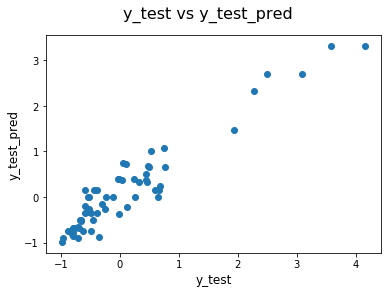

In [77]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 16)              
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_test_pred', fontsize = 12)  

In [78]:
# Calculate R-squared value 
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8997211435182686

In [79]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.92e-64
Time:                        17:40:57   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0748      0.029     -2.578      0.0

<b>Observations :</b>
- R-sqaured and Adjusted R-squared : 0.896 and 0.891 
- Prob(F-stats) (overall model fit) : 1.04e-67(approx. 0.0) - Model fit is significant
- p-values for all the coefficients are less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

<b>The equation of our best fitted line is:</b>

$ price = -0.0748 + 0.3978 \times carwidth + 0.5204 \times enginesize + 2.0419 \times rear + 0.7640 \times rotor + 1.1294 \times bmw - 0.5879 \times renault $